# Least Squares , Bitcoin and Fish
### By J. Sebastian Tenjo G.

The main idea of this notebook is show some applications ot the Least squares's theory in simples examples such as the  trend prediction in investments and the point set registration problem. The bibliography is shown throughout the development of the notebook. The language used was Julia. The data of Bitcoin was obteined in [database rep](http://investing.com/) and was organized with the help of my colleague Juan Angel Giraldo.

### ¿Which could be the bitcoin prince next week?
The short answer is "no", in stock markets it is necessary to consider the trend, randomness, seasonality and cyclicality of the data. In markets that are as volatile as the cryptocurrencies, the price of the asset cannot really be predicted, perhaps the trend, but specifically there are exogenous variables outside the data that influence the price, even so I will show how to implement the method least squares linearly and nonlinearly for this problem.

### 1.  Related with the nature of the data, which conditions should meet matrices A and b be solvable from the least squares perspective

One posibble formulation for least-squares, or linear regression, problem is that in general we have measurements $A \in \mathcal{R}^{m \times n}$ and $b \in \mathcal{R}^m$ and seek a vector $x \in \mathcal{R}^{n}$ such that $Ax$ is close to $b$. Closeness is defined as the sum of the squared differences:
$$ \sum_{i=1}^m (a_i^Tx - b_i)^2, $$
also known as the $\ell_2$-norm squared, $\|Ax - b\|_2^2$.

For example, we might have a dataset of $m$ bitcoin data, each represented by $n$ features or in the case of this notebook a price. Each row $a_i^T$ of $A$ is the features for user $i$ or the price for the data$(x_i)$, while the corresponding entry $b_i$ of $b$ is the measurement we want to predict from $a_i^T$, such as ad spending. The prediction is given by $a_i^Tx$.

We find the optimal $x$ by solving the optimization problem
$$  
    \begin{array}{ll}
    \mbox{minimize}   & \|Ax - b\|_2^2.
    \end{array}
$$
Let $x^\star$ denote the optimal $x$. The quantity $r = Ax^\star - b$ is known as the residual. If $\|r\|_2 = 0$, we have a perfect fit. This is the first condition that i cosiderer important.

In the matricial formulation we usually use the seudo-inverse, in some cases it is not essay calculate the seudo-inversa, some other conditions are when the matriz $A$ defined before had zero-colums, or serveral dependent rows that create a bad conditioned problem.

###  2. Use a least squares for non-linear models adjust the bitcoin price and perform a prediction using the model to determine the future daily price a week ahead, compare with the actual values

In [1]:
using CSV
using DataFrames
dataBitcoindecent = CSV.read("DataBitcoin/Bitcoin.csv",DataFrame);
#in class I commented that the data was not sorted from February to March, that's why a sort is necessary
dataBitcoin = sort!(dataBitcoindecent)

,Date,Price,Open,High,Low,Vol.,Change %
,String15,String15,String15,String15,String15,String7,String7
1,"Feb 07, 2022","43,833.9","42,385.2","44,468.3","41,695.4",76.60K,3.40%
2,"Feb 08, 2022","44,038.2","43,833.9","45,399.8","42,705.0",92.88K,0.47%
3,"Feb 09, 2022","44,388.9","44,038.2","44,800.4","43,163.0",50.92K,0.80%
4,"Feb 10, 2022","43,521.0","44,388.9","45,755.2","43,242.5",89.69K,-1.96%
5,"Feb 11, 2022","42,388.4","43,519.3","43,915.1","42,023.4",69.95K,-2.60%
6,"Feb 12, 2022","42,205.2","42,388.4","43,006.4","41,776.8",37.88K,-0.43%
7,"Feb 13, 2022","42,061.1","42,205.5","42,725.1","41,880.1",25.88K,-0.34%
8,"Feb 14, 2022","42,550.3","42,061.1","42,799.7","41,591.3",53.60K,1.16%
9,"Feb 15, 2022","44,544.4","42,550.3","44,722.6","42,460.1",56.34K,4.69%


In [2]:
dataBitcoin.Price .= replace.(dataBitcoin.Price, "," => "");
dataBitcoin.PriceFloat = parse.(Float64, dataBitcoin.Price);

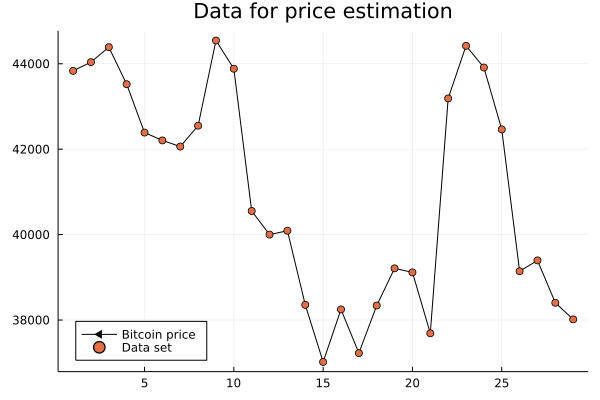

In [56]:
using Plots
dataBitcoin.Price .= replace.(dataBitcoin.Price, "," => "");
dataBitcoin.PriceFloat = parse.(Float64, dataBitcoin.Price);
#p1 =plot(dataBitcoin.PriceFloat);
p2 =(plot(dataBitcoin.PriceFloat,label = "Bitcoin price",  markershape = :ltriangle, color = "Black"))
plot!(dataBitcoin.PriceFloat, seriestype = :scatter, label="Data set", legend=:bottomleft)
#title!(p1, "Continued behavior of bitcoin")
title!(p2, "Data for price estimation")


The method depend of the grade of the polynomial that we use, some experiments that I run in Desmos suggest that a good solution should be a 4-degree Polynomial, but a 3-degree Polynomial is also a good option. I use the next solution based on the theory

Least squares solution:

$\tilde{x} = \mbox{arg min}_{x} J(\mathbf x) = \mbox{arg min}_{x} \| Ax - b \|_2^2$

$J(x) = \| Ax - b\|_2^2 = ( Ax - b )^T ( Ax - b ) = (A x)^T (A x) - (A x)^T b - b^T (A x) + b^T b$

$J(x) = x^T A^T Ax - 2 x^T A^T b + b^T b$

Now **minimizing** $J(x)$ w.r.t $x$:

$\frac{\partial J(x)}{\partial  x} = - 2 A^T b + 2 A^T A x = 0$

We obtain the [normal equations](https://en.wikipedia.org/wiki/Linear_least_squares#Derivation_of_the_normal_equations):

$A^T A x = A^T b$

The solution:

$x = (A^T A)^{-1} A^T  b = A^+ b$

With $A^+ = (A^T A)^{-1} A^T$ the Moore-Penrose pseudoinverse of $A$.


In [28]:
N = size(dataBitcoin.PriceFloat,1);
A = Array((1:N));
b = Array(dataBitcoin.PriceFloat);
A = [ones(N,1) A];
println(A)
println(b)

[1.0 1.0; 1.0 2.0; 1.0 3.0; 1.0 4.0; 1.0 5.0; 1.0 6.0; 1.0 7.0; 1.0 8.0; 1.0 9.0; 1.0 10.0; 1.0 11.0; 1.0 12.0; 1.0 13.0; 1.0 14.0; 1.0 15.0; 1.0 16.0; 1.0 17.0; 1.0 18.0; 1.0 19.0; 1.0 20.0; 1.0 21.0; 1.0 22.0; 1.0 23.0; 1.0 24.0; 1.0 25.0; 1.0 26.0; 1.0 27.0; 1.0 28.0; 1.0 29.0]
[43833.9, 44038.2, 44388.9, 43521.0, 42388.4, 42205.2, 42061.1, 42550.3, 44544.4, 43883.6, 40552.8, 40000.1, 40090.3, 38355.0, 37017.7, 38248.2, 37224.6, 38339.2, 39209.6, 39115.5, 37689.1, 43188.2, 44420.3, 43912.8, 42463.0, 39142.7, 39395.8, 38403.1, 38014.8]


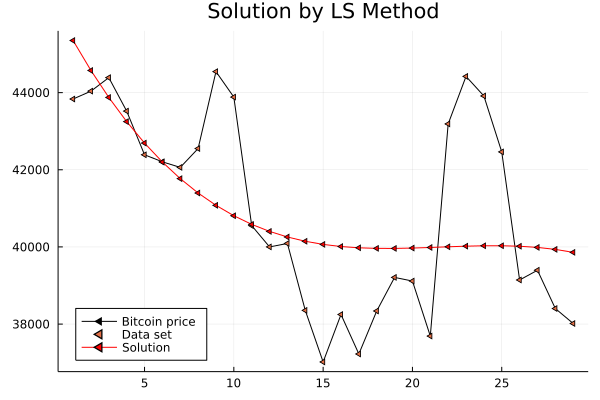

In [45]:
# The least Squares Method for the problem
N = size(dataBitcoin.PriceFloat,1); 
# Define the data structure for the Vandermonde Matrix
A_1 = ones(N,1); 
A_2 = Array((1:N)); 
A_3 = [a^2 for a in A_2];
A_4 = [a^3 for a in A_2];
 #  Vandermonde matrix and vector b
b = Array(dataBitcoin.PriceFloat);
A = [A_1 A_2 A_3 A_4 ]
sol = A\b; 
LSpred = Vector{Float64}(undef, N)
T = size(sol,1) 
 # Prepare the vector solution for graphing
for i in 1:T    
    LSpred += (sol[i]*A[:,i])
end
plot(A[:,2],b, title = "Solution by LS Method",  markershape = :ltriangle, label="Bitcoin price", legend=:bottomleft,color = "Black")
plot!(dataBitcoin.PriceFloat, markershape = :ltriangle, seriestype = :scatter,abel="Bitcoin price", label = "Data set" ,legend=:bottomleft)
plot!(A[:,2],LSpred, label="Solution", markershape = :ltriangle,color = "red")

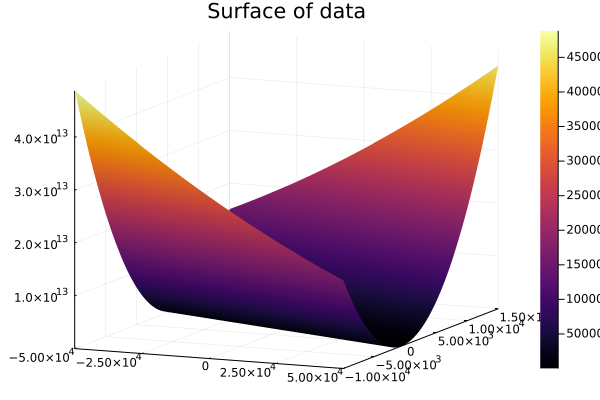

In [48]:
using Plots
function f(x,y) 
    sum((A[:,1]*x+A[:,2]*y-b)*transpose((A[:,1]*x+A[:,2]*y-b)))
end
plot()
surface(-50000:1000:50000,-10000:100:15000, f, title = "Surface of data")


Now I will determine the future daily price a week ahead and compare.

In [49]:
# Use the data with the next week
OrderedDataBitcoinWeekwithoutsort = CSV.read("DataBitcoin/BitcoinWeekAhead.csv",DataFrame);
dataBitcoinWeek = sort!(OrderedDataBitcoinWeekwithoutsort)
dataBitcoinWeek.Price .= replace.(dataBitcoinWeek.Price, "," => "");
dataBitcoinWeek.PriceFloat = parse.(Float64, dataBitcoinWeek.Price);
println(dataBitcoinWeek)

7×8 DataFrame
 Row │ Date          Price     Open      High      Low       Vol.     Change %  PriceFloat 
     │ String15      String15  String15  String15  String15  String7  String7   Float64    
─────┼─────────────────────────────────────────────────────────────────────────────────────
   1 │ Mar 08, 2022  38744.8   38,020.6  39,351.5  37,886.6  2.67B    1.89%        38744.8
   2 │ Mar 09, 2022  41929.0   38,731.5  42,538.5  38,663.3  3.60B    8.22%        41929.0
   3 │ Mar 10, 2022  39416.3   41,933.9  42,029.1  38,603.5  3.62B    -5.99%       39416.3
   4 │ Mar 11, 2022  38730.2   39,422.5  40,177.0  38,236.4  2.79B    -1.74%       38730.2
   5 │ Mar 12, 2022  38814.3   38,730.2  39,355.3  38,666.5  1.11B    0.22%        38814.3
   6 │ Mar 13, 2022  37792.4   38,813.2  39,272.3  37,603.4  1.55B    -2.63%       37792.4
   7 │ Mar 14, 2022  39671.1   37,789.5  39,914.3  37,613.6  2.33B    4.97%        39671.1


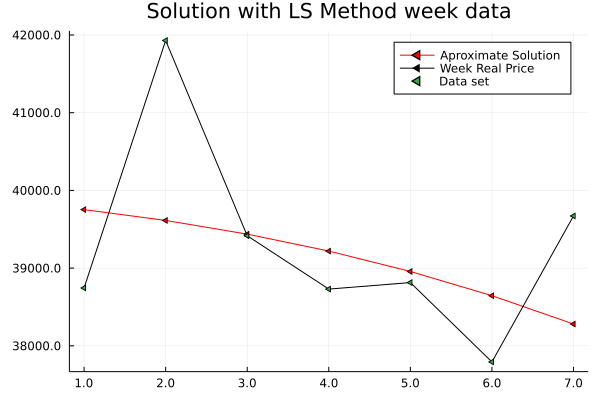

In [57]:
function f(x) # 3 or 4 degree polynomial for the solution
   sol[4]*x^3 +sol[3]*x^2+sol[2]*x + sol[1]
    #sol[5]*x^{4}+sol[4]*x^3 +sol[3]*x^2+sol[2]*x + sol[1]
end
pred = Vector{Float64}(undef, 7) 
for i in 1:7
    pred[i] = f(i+29)
end
plot(1:7, pred, title = "Solution with LS Method week data", markershape = :ltriangle, formatter = identity, label = "Aproximate Solution", legend = :topright, color = "Red")
plot!(1:7, dataBitcoinWeek.PriceFloat, label = "Week Real Price",markershape = :ltriangle,color = "black")
plot!(1:7, dataBitcoinWeek.PriceFloat,markershape = :ltriangle, seriestype = :scatter ,label = "Data set")

In [25]:
#The maen square error stimation
stimation = Array(dataBitcoinWeek.PriceFloat)
error = (abs(f(2)-stimation[2])/stimation[2])

0.06308291065556396

In conclusion, the values do have similarity since their error is 6 percent, however, from what was said at the beginning, this error does not necessarily mean that the estimate is good, it shows that the trend is for Bitcoin to fall due to what it happens with Russia and Ukraine, but to date bitcoin has increased a little.

### 3.Use least squares to determine the relationship between the bitcoin price and prices of three comodities namely, oil, silved and gold, during the last year.

In [26]:
using Statistics
using Dates
using LinearAlgebra

The main idea is organize the data in the same format and compare the differences between the data,  I used a error that is the maen value between the maximum a minimum dimension of the error. If this error is near to zero the data are similar, but if the value $p\notin [-1,1]$ is a idea that there are not relation between the data.

In [83]:
#The list for compare the comodities 
List1 = []
function comparison(csvName) 
    notOrderedData = CSV.read("DataBitcoin/"*csvName*".csv",DataFrame);
    # Take raw information and parse it to float number figures
    notOrderedData.Price .= replace.(notOrderedData.Price, "." => "");
    notOrderedData.Price .= replace.(notOrderedData.Price, "," => ".");
    notOrderedData.Fecha = parse.(Date, notOrderedData.Fecha, dateformat"d.m.y")
    notOrderedData.PriceFloat = parse.(Float64, notOrderedData.Price);
    data = sort!(notOrderedData)
    return data
end 
for name in ["Bitcoin","Oil","Gold","Silver"] # Import the pricefloat column of each dataframe
    push!(List1 , comparison(name*"Year").PriceFloat)
end
Bitcoin = Array(List1[1]) 
Oil = Array(List1[2])
Gold = Array(List1[3])
Silver = Array(List1[4]);
N = size(Silver,1)
A = [ones(N,1) Oil Gold Silver]
b = Bitcoin
x = A\b
stimatederror = Vector{Float64}(undef, N)
dig = 6

for i in 1:N
    p = [Oil[i]; Gold[i]; Silver[i]]
    n = abs([x[2];x[3];x[4]]'*p )
    d = norm(p)
    stimatederror[i] = n/d
end

comparerror = round(((maximum(stimatederror)-minimum(stimatederror))/2),digits=dig)
print("Similarity data error : $comparerror " )


Similarity data error : 2.740874 

In Conclusion the comodities do not have relation. 

### 4. Solve the [point set registration problem](https://en.wikipedia.org/wiki/Point-set_registration). Hint (check: S. Umeyama, Least-Squares Estimation of Transformation Parameters Between Two Point Patterns, IEEE Trans. Pattern Anal. Mach. Intell., vol. 13, no. 4, 1991). Construct a GUI to test.

The point set registration problem acording to the information that i was reading has de purpose of estimate the transformation between to or more point sets, and it is really useful when we want to compare tow images, or maybe the same picture but in diferent position. In the literature some algorithms are famous for the efficent solution of this problem, but it is a homework about least squares and one posibillite is solve the problem with the *Single Value Decompositivon (SVD)*. Given two point sets $P$ and $P^{-1}$ the idea is writing the relation between like:
$$ P^{-1}= RP + T + N $$

Here, $R$ is the rotation matriz, $T:$ is the translation matrix and finally $N$ is a noise vector. Of course we want find $R,T$ and minimize the function

$$  F = \sum_{n=1}^{N}(P^{-1}- (RP + T))^{2}$$ This idea is implemented by Arun, Huang et al. Least Square Fitting of Two 3-D Point Sets:https://ieeexplore.ieee.org/document/4767965

Of course, more calculations are required, but the basic idea is that if the minimization problem can be solved, a comparison can be made between the two sets and a solution to the problem can be found. 

With this motivation i start my solution with the sets $P = x_{i}$ and $P^{-1} = y_{i}; i \in \{ 1, 2, \dots , N)$. Lets start with a simple parametrization of a fish. And i choose 200 point in the boundary of the figure. The graph is shown below. The main idea is build a first fish and then work with a new fish with a rotation and diferente position to compare the two image.



In [66]:
using LinearAlgebra
using Random

In [67]:
#Parametrization of the fish 
fx(t) = -(8*cos(t)- 8*sin(t)*sin(t)/(sqrt(2)));
fy(t) = 8*cos(t)*sin(t);
#Points in the boundary and the limits of the figure
N = 200;
tl = LinRange(0, 2π, N);

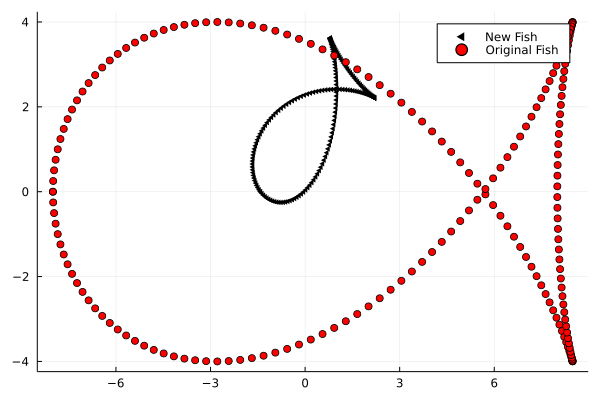

In [68]:
#This code is the construction of the graph, and i need evaluate the points in the parametrizations between the limit of 0, 2pi
ti = LinRange(1, 1, N)
#I introduce a rotational value and this reflect in the black fish in the graph below
x_1 = fx.(tl)*0.25 + ti;
x_2 = fy.(tl)*0.25 + ti;
y_1 = fx.(tl);
y_2 = fy.(tl); 
#There are two components P = X an P^{-1} = Y 
X = [x_1 x_2];
Y = [y_1 y_2]
#Introduce a rotation 
θ = π/4;
M = Array([cos(θ) -sin(θ); sin(θ) cos(θ)]);
for i = 1:N
    X[i, :] = M*X[i, :]
end
using Plots
scatter(X[:, 1], X[:, 2],label = "New Fish",markershape = :ltriangle, linestyle = :dashdot, color = [:black :orange])
scatter!(Y[:, 1], Y[:, 2],label = "Original Fish",markershape = :circle, linestyle = :dashdot, color=:red)

We define the mean vectors $\mu_x$, $\mu_y$ of $X$, $Y$ respectively, by The variance of the mean vectors $\sigma_x^2$ and $\sigma_y^2$ of $X$ and $Y$ respectively, is defined as

\begin{equation*}
\mu_x = \frac{1}{N} \sum_{i = 1}^{N} \textbf{x}_i ; \hspace{0,4cm} \sigma_x^2 = \frac{1}{N} \sum_{i=1}^{N} ||\textbf{x}_i - \textbf{$\mu$}_x||^2
\end{equation*}

\begin{equation*}
\mu_y = \frac{1}{N} \sum_{i = 1}^{N} \textbf{y}_i;\hspace{0,4cm} \sigma_y^2 = \frac{1}{N} \sum_{i=1}^{N} ||\textbf{y}_i - \textbf{$\mu$}_y||^2
\end{equation*}




In [69]:
function mu(points)
    μ = fill(0,2);
    for i = 1:N
        μ += points[i, :];
    end
    μ = (1/N)*μ;
end

μ_x = mu(X);
μ_y = mu(Y);
function sigmap(points, miu)
    σ = 0;
    for i = 1:N
        σ += (norm(points[i, :] - miu))^2;
    end
    σ = (1/N)*σ;
end

σ_x = sigmap(X, μ_x);
σ_y = sigmap(Y, μ_y)

44.36334279912979

In [70]:
Σ_x_y = fill(0,2,2);
for i = 1:N
    Σ_x_y += (Y[i, :] - μ_y)*transpose(X[i, :] - μ_x);
end
Σ_x_y = (1/N)*Σ_x_y 
#Singular Value Descomposition
U, D, V = svd(Σ_x_y)

SVD{Float64, Float64, Matrix{Float64}}
U factor:
2×2 Matrix{Float64}:
 -1.0          5.55112e-17
  3.69257e-17  1.0
singular values:
2-element Vector{Float64}:
 9.100835699782447
 1.9900000000000002
Vt factor:
2×2 Matrix{Float64}:
 -0.707107  -0.707107
 -0.707107   0.707107

In [71]:
m = size(D, 1);

if rank(Σ_x_y) >= m-1
    if det(Σ_x_y) >= 0
        S = 1*I(m);
    else 
        S = 1*I(m)
        S[m,m] = -1;
    end
elseif rank(Σ_x_y) == m-1
       if det(U)*det(V) == 1
            S = 1*I(m);
       elseif det(U)*det(V) == -1
            S = 1*I(m);
            S[m,m] = -1;
       end
end

2×2 Diagonal{Int64, Vector{Int64}}:
 1  ⋅
 ⋅  1

In the next code I have the  matrix of $X$ and $Y$ $\Sigma_{xy}$  is given by

\begin{equation*}
\Sigma_{xy} = \frac{1}{N} \sum_{i=0}^{N} (\textbf{y}_i -\mu_y)(\textbf{x}_i - \mu_x)^{T}
\end{equation*}

Also it is important calculate the rotation matrix $R$, the traslation vector $t$, and the scaling scalar $c$ are defined
\begin{equation*}
\begin{split}
R &= USV^T \\
t &= \mu_y - cR\mu_x \\
c &= \frac{1}{\sigma_x^2}tr(DS)
\end{split}
\end{equation*}

Finally I use the rotation matrix for the final part to generate the gif presented in the session of Julia (Fridays)


\begin{equation*}
   \left(\begin{matrix}
     cos(\theta) & -sin(\theta) \\
     sin(\theta) & cos(\theta)
    \end{matrix}\right)
\end{equation*}
   

In [72]:
R = U*S*transpose(V);
c = (1/σ_x)*tr(diagm(D)*S);
t_r = μ_y - c*R*μ_x;
display(R)
display(c)
display(t_r)

2×2 Matrix{Float64}:
  0.707107  0.707107
 -0.707107  0.707107

3.999999999999999

2-element Vector{Float64}:
 -4.000000000000002
 -3.9999999999999982

In [73]:
# Calculation of errors
e_2 = 0;
for i = 1:N
    e_2 += (norm(Y[i, :]-(c*R*X[i, :] + t_r)) )^2
end
e_2 = (1/N)* e_2;

ϵ_2 = σ_y - tr(diagm(D)*S)^2/σ_x;

display(e_2)
display(ϵ_2)

1.7580107732115102e-29

7.105427357601002e-15

In [74]:
X̂ = fill(0., N, m);

for i = 1:N
    X̂[i,:] = c*R*X[i, :]+t_r
end

display(X̂)

200×2 Matrix{Float64}:
 -8.0       4.44089e-16
 -7.99038   0.252423
 -7.96153   0.503839
 -7.91354   0.753247
 -7.84653   0.999652
 -7.7607    1.24207
 -7.65628   1.47954
 -7.53354   1.71111
 -7.39284   1.93586
 -7.23455   2.1529
 -7.0591    2.36135
 -6.86697   2.56038
 -6.65868   2.74922
  ⋮        
 -6.86697  -2.56038
 -7.0591   -2.36135
 -7.23455  -2.1529
 -7.39284  -1.93586
 -7.53354  -1.71111
 -7.65628  -1.47954
 -7.7607   -1.24207
 -7.84653  -0.999652
 -7.91354  -0.753247
 -7.96153  -0.503839
 -7.99038  -0.252423
 -8.0      -8.88178e-16

┌ Info: Saved animation to 
│   fn = C:\Users\tenjo\herramientaJulia\tmp.gif
└ @ Plots C:\Users\tenjo\.julia\packages\Plots\5S9Hg\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\tenjo\\herramientaJulia\\tmp.gif")
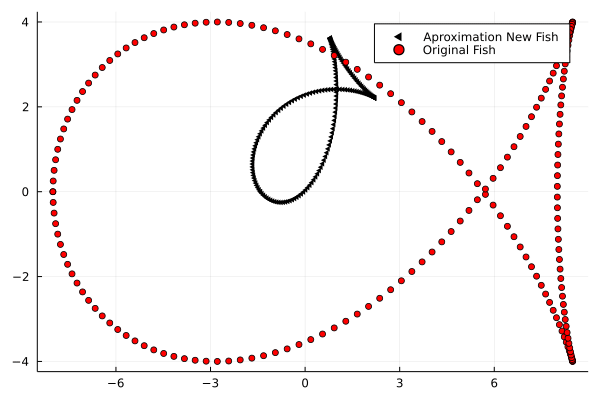

In [75]:
β = acos(R[1,1]);
Rot = Array([cos(β) -sin(β); sin(β) cos(β)]);
        
if (1. + ((c-1.)/β))*X*transpose(Rot) + ones(N,m)*diagm(t_r) == X̂
    β = β
else
    β = -β
end

@gif for i in range(0, β, 100)
         Rot = Array([cos(i) -sin(i); sin(i) cos(i)])
         Z = (1. + ((c-1.)/β)*i)*X*transpose(Rot) + (i/β)*ones(N,m)*diagm(t_r)
         scatter(Z[:,1], Z[:, 2], label = "Aproximation New Fish",markershape = :ltriangle, linestyle = :dashdot, color = [:black :orange])
         scatter!(Y[:, 1], Y[:, 2], label = "Original Fish ",color=:red)
end 

Thank you for your attention, some references used are

[1] Whittle, P. (1952). On principal components and least square methods of factor analysis. Scandinavian Actuarial Journal, 1952(3-4), 223-239.

[2] Myronenko, A., & Song, X. (2010). Point set registration: Coherent point drift. IEEE transactions on pattern analysis and machine intelligence, 32(12), 2262-2275.

[3] Stojiljkovic, M. (2021). Linear regression in Python.
